### 데이터 기본 전처리

In [5]:
# 전처리를 위한 라이브러리 불러오기
import pandas as pd
import numpy as np

# 데이터 가져올 때 encoding="CP949"
# 만약 CP949 안 먹히면 "UTF8"
# ----------------------------------------------------------------------------

# GDP 전처리   
gdp = pd.read_csv("./datasets/data/국내총생산.csv").transpose()
gdp = gdp.iloc[4:].rename(columns={0:"GDP"})

## GDP 전처리 저장
gdp.to_csv("./datasets/data_after/GDP_전처리.csv", index=False, encoding="CP949")
gdp = pd.read_csv("./datasets/data_after/GDP_전처리.csv", encoding="CP949")
# ----------------------------------------------------------------------------

# 소비자물가지수 전처리
sobija = pd.read_csv("./datasets/data/소비자물가지수.csv").transpose()
sobija = sobija.iloc[5:].rename(columns={0:"소비자물가지수"})

# 인플레이션율 전처리
sobija['인플레이션율'] = (sobija['소비자물가지수'].diff() / sobija['소비자물가지수'].shift(1)) * 100
sobija.to_csv("./datasets/data_after/소비자물가지수.csv", encoding="CP949")

sobija = pd.read_csv("./datasets/data_after/소비자물가지수.csv", encoding="CP949")
sobija = sobija.rename(columns={'Unnamed: 0':'index'})

## 시계열 처리
sobija['index'] = pd.to_datetime(sobija['index'], format="%Y/%m").dt.strftime("%Y-%m")

## 소비자물가지수, 인플레이션율 전처리 저장 
sobija.to_csv("./datasets/data_after/물가지수인플레_전처리.csv", index=False, encoding="CP949")
sobija = pd.read_csv("./datasets/data_after/물가지수인플레_전처리.csv", encoding="CP949")
# ----------------------------------------------------------------------------

# 주택종합 매매가격지수 전처리
meme = pd.read_excel("./datasets/data/주택종합 매매가격지수_20220808.xlsx")
meme = meme[0:1].transpose().reset_index().drop(index=0)

## 시계열 처리
meme['index'] = pd.to_datetime(meme['index'], format="%Y-%m-%d %HH:%M:%S").dt.strftime("%Y-%m")
meme = meme.rename(columns={0:"주택종합 매매가격지수"})
meme.reset_index(drop=True)

## 주택종합 매매가격지수 전처리 저장
meme.to_csv("./datasets/data_after/주택종합_매매가격지수_전처리.csv", index=False, encoding='CP949')
meme = pd.read_csv("./datasets/data_after/주택종합_매매가격지수_전처리.csv", encoding="CP949")
# ----------------------------------------------------------------------------

# 주택종합 전세가격지수 전처리
junsae = pd.read_excel("./datasets/data/주택종합 전세가격지수_20220808.xlsx")
junsae = junsae[0:1].transpose().reset_index().drop(index=0)

## 시계열 처리
junsae['index'] = pd.to_datetime(junsae['index'], format="%Y-%m-%d %HH:%M:%S").dt.strftime("%Y-%m")
junsae = junsae.rename(columns={0:"주택종합 전세가격지수"}).reset_index(drop=True)

## 주택종합 전세가격지수 전처리 저장
junsae.to_csv("./datasets/data_after/주택종합_전세가격지수_전처리.csv", index=False, encoding='CP949')
junsae = pd.read_csv("./datasets/data_after/주택종합_전세가격지수_전처리.csv", encoding="CP949")
# ----------------------------------------------------------------------------

# # 실업자 전처리
# unemploy = pd.read_csv("./datasets/data/연령별_경제활동인구_총괄_20220808152350(월별).csv", encoding='CP949').transpose()

# ## 임시로 데이터를 담아놓을 데이터프레임과 리스트 선언
# unemploy_real = []
# unemploy = pd.DataFrame()

# ## 반복문으로 맨 처음 한번은 건너뛰고 csv 파일 끝까지 돌리기
# for i in range(len(unemploy)):
#     if(i*8-4 == len(unemploy)+3): break
#     if(i==0): continue

# ## 반복문으로 실업자만 골라서 리스트에 저장
#     unemploy = unemploy.iloc[i*8-4]
#     unemploy.append(unemploy)

# unemploy = pd.DataFrame(unemploy).drop(columns=[0])
# unemploy.rename(columns={1:"15세 이상", 2:"15-19", 3:"20-29", 4:"30-39", 5:"40-49", 6:"50-59", 7:"60세 이상", 8:"15-64", 9:"15-24", 10:"15-29"})

# ## 실업자로 구하고 싶으면 i*8-4, len(unemploy)+3 으로 변경
# ## 실업률로 구하고 싶으면 i*8-1, len(unemploy)+6 으로 변경
# ## iloc로 필요한 성분을 조회해서 그 때 그 때 위치에 맞춰서 조정하면 다른 데이터도 뽑을 수 있음

# unemploy = unemploy.reset_index()

# ## 시계열 처리
# unemploy['index'] = pd.to_datetime(unemploy['index'], format="%Y.%m.").dt.strftime("%Y-%m")

# unemploy.set_index('index').to_csv("../전처리/실업자_전처리(천명).csv", encoding="CP949")
unemploy = pd.read_csv("./datasets/data_after/실업자_전처리(천명).csv", encoding="CP949")

## 실업자수 15세 이상 & 15-64만 추출
unemploy = unemploy.rename(columns={'15세 이상':'15세 이상 실업자 수', '15-64':'15-64 실업자 수'})
unemploy = unemploy[['index','15세 이상 실업자 수','15-64 실업자 수']]

## 실업자 전처리 저장
unemploy.to_csv("./datasets/data_after/실업자(단위_천명)_전처리.csv", index=False, encoding="CP949")
unemploy = pd.read_csv("./datasets/data_after/실업자(단위_천명)_전처리.csv", encoding="CP949")
# ----------------------------------------------------------------------------

# MBS조기상환율 전처리
## MBS조기상환율 데이터 불러오기
mbs1 = pd.read_csv("./datasets/data/K-MBS_200406-200412.csv", header=None)
mbs2 = pd.read_csv("./datasets/data/K-MBS_200501-201012.csv", header=None)
mbs3 = pd.read_csv("./datasets/data/K-MBS_201101-201512.csv", header=None)
mbs4 = pd.read_csv("./datasets/data/K-MBS_201601-202012.csv", header=None)
mbs5 = pd.read_csv("./datasets/data/K-MBS_202101-202208.csv", header=None)

## 필요한 칼럼만 추출
mbs1 = mbs1[[0,1,2,8]]
mbs2 = mbs2[[0,1,2,8]]
mbs3 = mbs3[[0,1,2,8]]
mbs4 = mbs4[[0,1,2,8]]
mbs5 = mbs5[[0,1,2,8]]

## MBS 조기상환율 데이터 합치고 MBS만 들어간 데이터를 추출
mbs = pd.concat([mbs1, mbs2, mbs3, mbs4, mbs5], ignore_index=True).dropna() 
mbs = mbs.loc[mbs[0].str.contains('MBS', na = False),:]                     
mbs = mbs.rename(columns={0:'발행회차', 1:'발행일자', 2:'기준월', 8:'만기전상환율'})

## 시계열 처리
mbs['발행일자'] = pd.to_datetime(mbs['발행일자'], format="%Y-%m-%d").dt.strftime("%Y-%m-%d")
mbs['기준월'] = pd.to_datetime(mbs['기준월'], format="%Y-%m").dt.strftime("%Y-%m")

## 발행회차, 기준월 기준으로 재정렬
mbs = mbs.sort_values(['발행회차','기준월'], ascending=True).reset_index(drop=True)

## MBS조기상환율 전처리 저장
mbs.to_csv("./datasets/data_after/mbs_test_전처리.csv", index=False, encoding='CP949')
mbs = pd.read_csv("./datasets/data_after/mbs_test_전처리.csv", encoding="CP949")
# ---------------------------------------------------

# MBS 발행금리 전처리
mbs_gum = pd.read_csv("./datasets/data/MBS발행금리_20040101-20220810.csv", header=None, encoding="UTF8")

## mbs 금리 헤더 제거
mbs_gum2 = mbs_gum[1:].copy()

## 불필요 컬럼 제거
mbs_gum2.drop(columns=[3,4,5,6,7,8], inplace=True)

## 컬럼 이름 변경
mbs_gum2 = mbs_gum2.rename(columns={0:'발행회차', 1:'발행일자', 2:'가중평균발행금리'})

## 발행일자에 대한 시계열 처리 수행
mbs_gum2['발행일자'] = pd.to_datetime(mbs_gum2['발행일자'], format="%Y-%m-%d").dt.strftime("%Y-%m-%d")

## 발행회차 기준으로 재정렬
mbs_gum2 = mbs_gum2.sort_values(['발행회차'], ascending=True).reset_index(drop=True)

## MBS 발행금리 전처리 저장
mbs_gum2.to_csv("./datasets/data_after/mbs_금리_최종_전처리.csv", index=False, encoding='CP949')
mbs_gum2 = pd.read_csv("./datasets/data_after/mbs_금리_최종_전처리.csv", encoding="CP949")
# # ----------------------------------------------------------------------------

# 예금은행 대출금리 전처리
banking = pd.read_csv("./datasets/data/예금은행 대출금리(신규취급액 기준)_200401-202206.csv")

## 시계열 처리
banking['변환'] = pd.to_datetime(banking['변환'], format="%Y/%m").dt.strftime("%Y-%m")

## 예금은행 대출금리 전처리 저장
banking.to_csv("./datasets/data_after/예금은행 대출금리_전처리.csv", index=False, encoding='CP949')
banking = pd.read_csv("./datasets/data_after/예금은행 대출금리_전처리.csv", encoding='CP949')
# ----------------------------------------------------------------------------

# kospi 전처리
## kospi 월말데이터로 변환
import FinanceDataReader as fdr
kospi_d = fdr.DataReader('KS11', '2004-01-01', '2022-07-31')
kospi_m = kospi_d.resample('M').last().reset_index()

## 시계열 처리하고 필요한 컬럼 추출
kospi_m['Date'] = pd.to_datetime(kospi_m['Date'], format="%Y-%m-%d").dt.strftime("%Y-%m")
kospi = kospi_m[['Date','Close']]

## kospi 전처리 저장
kospi.to_csv("./datasets/data_after/kospi_전처리.csv", index=False, encoding='CP949')
kospi = pd.read_csv("./datasets/data_after/kospi_전처리.csv", encoding='CP949')
# ----------------------------------------------------------------------------

# LTV, DTI전처리
## LTV, DTI 컬럼 이름 변경하기
ltv_dti = pd.read_csv("./datasets/data/LTV_DTI.csv", header=None)
ltv_dti = ltv_dti[[0,1,2,5,6,7]]
ltv_dti = ltv_dti.rename(columns={0:"발행회차", 1:"발행일자", 2:"기준월", 5:"평균 LTV", 6:"평균 DTI", 7:"조기상환율"}).reset_index(drop=True)

## 시계열 처리
ltv_dti['발행일자'] = pd.to_datetime(ltv_dti['발행일자'], format="%Y-%m-%d").dt.strftime("%Y-%m-%d")
ltv_dti['기준월'] = pd.to_datetime(ltv_dti['기준월'], format="%Y-%m").dt.strftime("%Y-%m")

## 불필요 컬럼 제거하고 재정렬
ltv_dti.drop(columns=['발행회차'], inplace=True)
ltv_real = ltv_dti.sort_values(['발행일자', '기준월'], ascending=True).reset_index(drop=True).dropna()

## LTV, DTI전처리 저장
ltv_dti.to_csv("./datasets/data_after/LTV_DTI_전처리.csv", index=False, encoding='CP949')
ltv_dti = pd.read_csv("./datasets/data_after/LTV_DTI_전처리.csv", encoding='CP949')
# ----------------------------------------------------------------------------

# CD01물 금리 전처리
## 불필요 컬럼 제거
cd_91 = pd.read_excel("./datasets/data/CD금리.xls")
cd_real = cd_91.iloc[1:7].transpose().reset_index(drop=True).dropna()
cd_real.drop(columns=[2,3,4,5], inplace=True)

## 컬럼 이름 변경 하고 시계열 처리
cd_real = cd_real.rename(columns={1:'기준월', 6:'CD금리'})
cd_real['기준월'] = pd.to_datetime(cd_real['기준월'], format="%Y%m월").dt.strftime("%Y-%m")

## CD01물 금리 전처리 저장
cd_real.to_csv("./datasets/data_after/CD금리_전처리.csv", encoding="UTF8", index=False)
cd_91 = pd.read_csv("./datasets/data_after/CD금리_전처리.csv", encoding="UTF8")
# ----------------------------------------------------------------------------

# 미국 기준금리 전처리
america_rate = pd.read_csv("./datasets/data/FEDFUNDS.csv")

## 컬럼 이름 변경 하고 시계열 처리
america_rate = america_rate.rename(columns={'DATE':'기준월', 'FEDFUNDS':'미국 실효금리'})
america_rate['기준월'] = pd.to_datetime(america_rate['기준월'], format="%Y-%m-%d").dt.strftime("%Y-%m")

## 기준금리 전처리 저장
america_rate.to_csv("./datasets/data_after/미국실효금리_전처리.csv",encoding='CP949', index=False)
america_rate = pd.read_csv("./datasets/data_after/미국실효금리_전처리.csv", encoding="CP949")

### 데이터프레임을 만들기 위한 전처리

In [10]:
# MBS 발행금리와 MBS데이터 합치기
mbs_real = pd.merge(mbs, mbs_gum2, on='발행회차', how='left')
mbs_real.drop(columns=['발행일자_x'], inplace=True)

# 컬럼 이름바꾸기
mbs_real = mbs_real.rename(columns={'발행일자_y':'발행일자'})

## 발행회차, 기준월 기준으로 재정렬
mbs_real = mbs_real.sort_values(['발행회차', '기준월'], ascending=True).reset_index(drop=True).dropna()
mbs_real.to_csv("./datasets/data_after/mbs_merge_real.csv", encoding='CP949')
# ----------------------------------------------------------------------------

# 주택지수끼리 합치기
house = pd.merge(meme, junsae, on='index', how='left')
# ----------------------------------------------------------------------------

# complete에 주택 지수랑 소비자 지수 합치기
complete = pd.merge(house, sobija, on='index', how='left')

# complete에 실업자수 합치기
complete = pd.merge(complete, unemploy, on='index', how='left')

# complete로 담아놨던 것들에서 결측치 제거
complete = complete.dropna().copy()
# ----------------------------------------------------------------------------

# test에 complete와 MBS 발행금리와 MBS데이터 합치기
test = pd.merge(complete, mbs_real, left_on='index', right_on='기준월')

# test에 MBS kospi 합치기
test = pd.merge(test, kospi, left_on='기준월', right_on='Date')
test

# test에 예금금리 합치기
test = pd.merge(test, banking, left_on='기준월', right_on='변환')

# test에 LTV, DTI 합치기
test = pd.merge(test, ltv_real, on=['발행일자', '기준월'], how="left")

# test에 CD91 금리 합치기
test = pd.merge(test, cd_91, on='기준월', how='left')

# test에 미국 기준금리 합치기
test = pd.merge(test, america_rate, on='기준월', how='left')
test.columns
# ----------------------------------------------------------------------------

# 전처리 최종작업
## 불필요한 컬럼 제거하고 컬럼명 변경
test.drop(columns=['index', '15세 이상 실업자 수', 'Date'], inplace=True)
test = test.rename(columns={'Close':'코스피 월별 종가'})
test.drop(columns=['변환'], inplace=True)
test = test[['발행회차', '발행일자', '기준월', '만기전상환율', '가중평균발행금리', '주택종합 매매가격지수', '주택종합 전세가격지수',
'소비자물가지수', '15-64 실업자 수', '코스피 월별 종가', '원자료', '평균 LTV', '평균 DTI', 'CD금리', '인플레이션율', '미국 실효금리']]
test = test.rename(columns={'원자료':'예금은행 대출금리'})

## 다시 재정렬하고 결측치 없애rl
test = test.sort_values(['발행일자', '기준월'], ascending=True).reset_index(drop=True).dropna()

## 전처리 최종 저장
test.to_csv("./datasets/data_after/전처리_최종_V3.csv", index=False, encoding="CP949")
test
data = pd.read_csv("./datasets/data_after/전처리_최종_V3.csv", encoding="CP949")
# ----------------------------------------------------------------------------

### log&lag 처리


In [11]:
# 기준월 기준으로 데이터 그룹화
data_a = data.groupby(['기준월']).mean()

## - 만기전 상환율 : Target -> 그대로
## - 가중평균발행금리, 금리차, 조기상환율, LTV, DTI -> 그대로
## - 주택종합 매매가격지수, 전세가격지수 : lag 처리
## - 실업자, 소비자물가지수 : lag 처리하고 log 처리
## - 예금은행대출금리, CD금리, 코스피 : lag 처리 하고 log 처리

data_a['주택종합 매매가격지수'] = data_a['주택종합 매매가격지수'].shift(1)
data_a['주택종합 전세가격지수'] = data_a['주택종합 전세가격지수'].shift(1)
data_a["예금은행 대출금리"] = np.log(data_a["예금은행 대출금리"]).shift(1)
data_a["소비자물가지수"] = np.log(data_a["소비자물가지수"]).shift(1)
data_a["코스피 월별 종가"] = np.log(data_a["코스피 월별 종가"]).shift(1)
data_a["15-64 실업자 수"] = np.log(data_a["15-64 실업자 수"]).shift(1)
data_a["CD금리"] = np.log(data_a["CD금리"]).shift(1)
data_a['미국 실효금리'] = data_a['미국 실효금리'].shift(1)

# 결측치 및 중복컬럼 삭제
data_a.dropna(inplace=True)

# log%lag 데이터 저장
data_a.to_csv("./datasets/data_after/전처리_최종_V3_loglag.csv", encoding="CP949")


In [12]:
data.head()

,발행회차,발행일자,기준월,만기전상환율,가중평균발행금리,주택종합 매매가격지수,주택종합 전세가격지수,소비자물가지수,15-64 실업자 수,코스피 월별 종가,예금은행 대출금리,평균 LTV,평균 DTI,CD금리,인플레이션율,미국 실효금리
0,MBS 2004-01,2004-06-15,2004-06,0.51,5.04,52.743,51.435,72.119,794.0,785.79,5.99,60.66,34.53,3.91,0.000000,1.03
1,MBS 2004-01,2004-06-15,2004-07,0.36,5.04,52.603,51.040,72.561,858.0,735.34,5.93,60.67,34.53,3.91,0.612876,1.26
2,MBS 2004-01,2004-06-15,2004-08,0.42,5.04,52.394,50.554,73.191,842.0,803.57,5.80,60.67,34.53,3.70,0.868235,1.43
3,MBS 2004-01,2004-06-15,2004-09,0.29,5.04,52.283,50.314,73.191,784.0,835.09,5.63,60.68,34.55,3.52,0.000000,1.61
4,MBS 2004-01,2004-06-15,2004-10,0.42,5.04,52.157,50.090,73.191,801.0,834.84,5.57,60.69,34.53,3.52,0.000000,1.76


### 데이터 정규성 확인

c:\Users\subin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\subin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


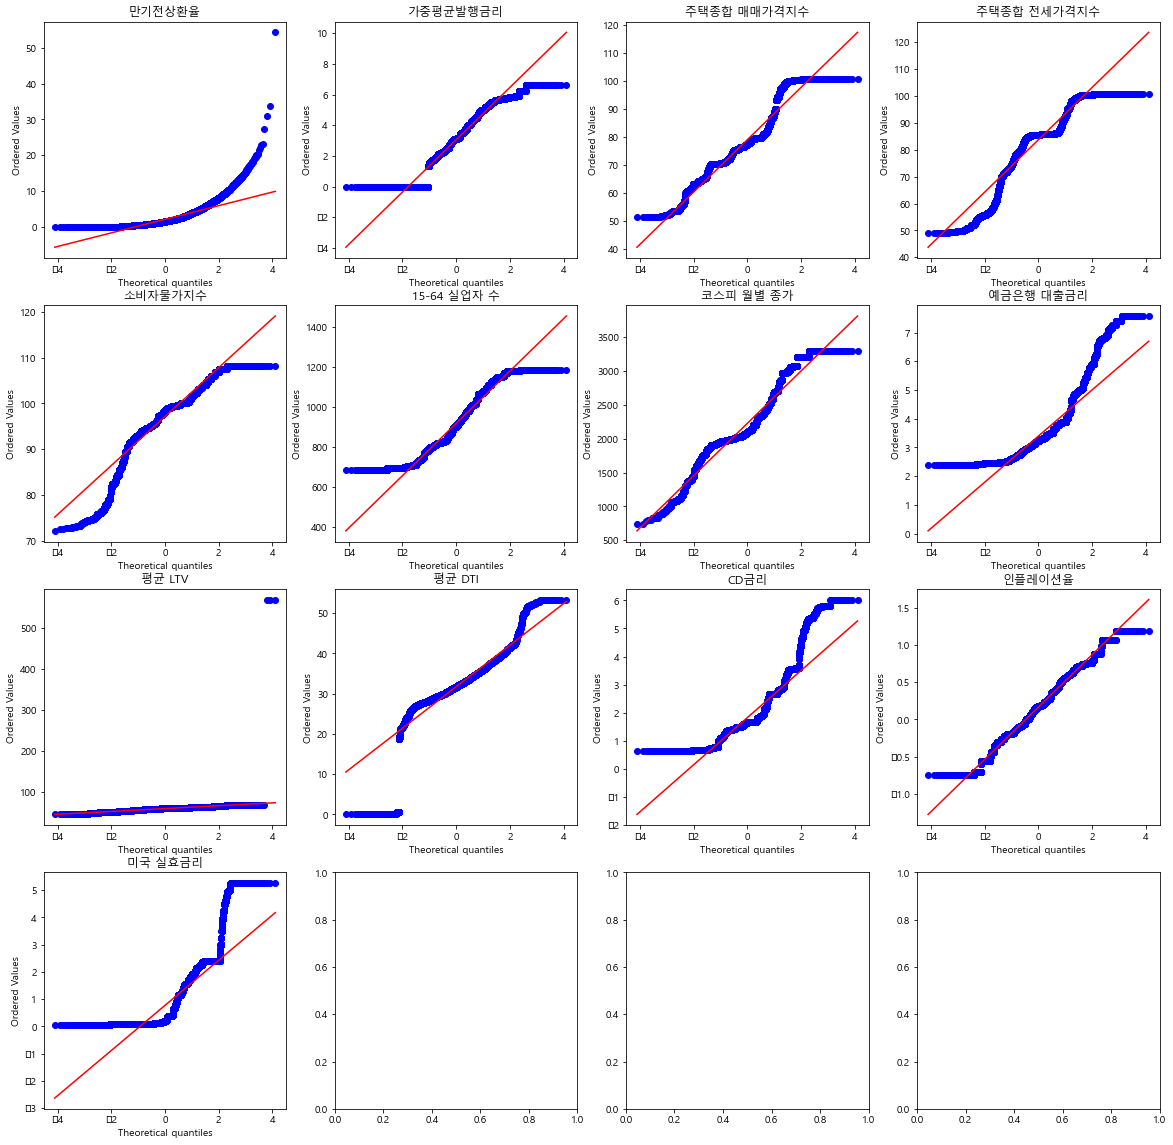

In [14]:
# 원본 데이터
from matplotlib.pyplot import imread
import matplotlib.pyplot as plt
from scipy import stats

fig, axes = plt.subplots(4, 4)
fig.set_size_inches((20,20))
plt.rc('font', family='Malgun Gothic') ## 한글 깨짐 설정

stats.probplot(data["만기전상환율"], dist=stats.norm, plot=axes[0,0])
axes[0,0].title.set_text("만기전상환율")
stats.probplot(data["가중평균발행금리"], dist=stats.norm, plot=axes[0,1])
axes[0,1].title.set_text("가중평균발행금리")
stats.probplot(data["주택종합 매매가격지수"], dist=stats.norm, plot=axes[0,2])
axes[0,2].title.set_text("주택종합 매매가격지수")
stats.probplot(data["주택종합 전세가격지수"], dist=stats.norm, plot=axes[0,3])
axes[0,3].title.set_text("주택종합 전세가격지수")
stats.probplot(data["소비자물가지수"], dist=stats.norm, plot=axes[1,0])
axes[1,0].title.set_text("소비자물가지수")
stats.probplot(data["15-64 실업자 수"], dist=stats.norm, plot=axes[1,1])
axes[1,1].title.set_text("15-64 실업자 수")
stats.probplot(data["코스피 월별 종가"], dist=stats.norm, plot=axes[1,2])
axes[1,2].title.set_text("코스피 월별 종가")
stats.probplot(data["예금은행 대출금리"], dist=stats.norm, plot=axes[1,3])
axes[1,3].title.set_text("예금은행 대출금리")
stats.probplot(data["평균 LTV"], dist=stats.norm, plot=axes[2,0])
axes[2,0].title.set_text("평균 LTV")
stats.probplot(data["평균 DTI"], dist=stats.norm, plot=axes[2,1])
axes[2,1].title.set_text("평균 DTI")
stats.probplot(data["CD금리"], dist=stats.norm, plot=axes[2,2])
axes[2,2].title.set_text("CD금리")
stats.probplot(data["인플레이션율"], dist=stats.norm, plot=axes[2,3])
axes[2,3].title.set_text("인플레이션율")
stats.probplot(data["미국 실효금리"], dist=stats.norm, plot=axes[3,0])
axes[3,0].title.set_text("미국 실효금리")

c:\Users\subin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\subin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


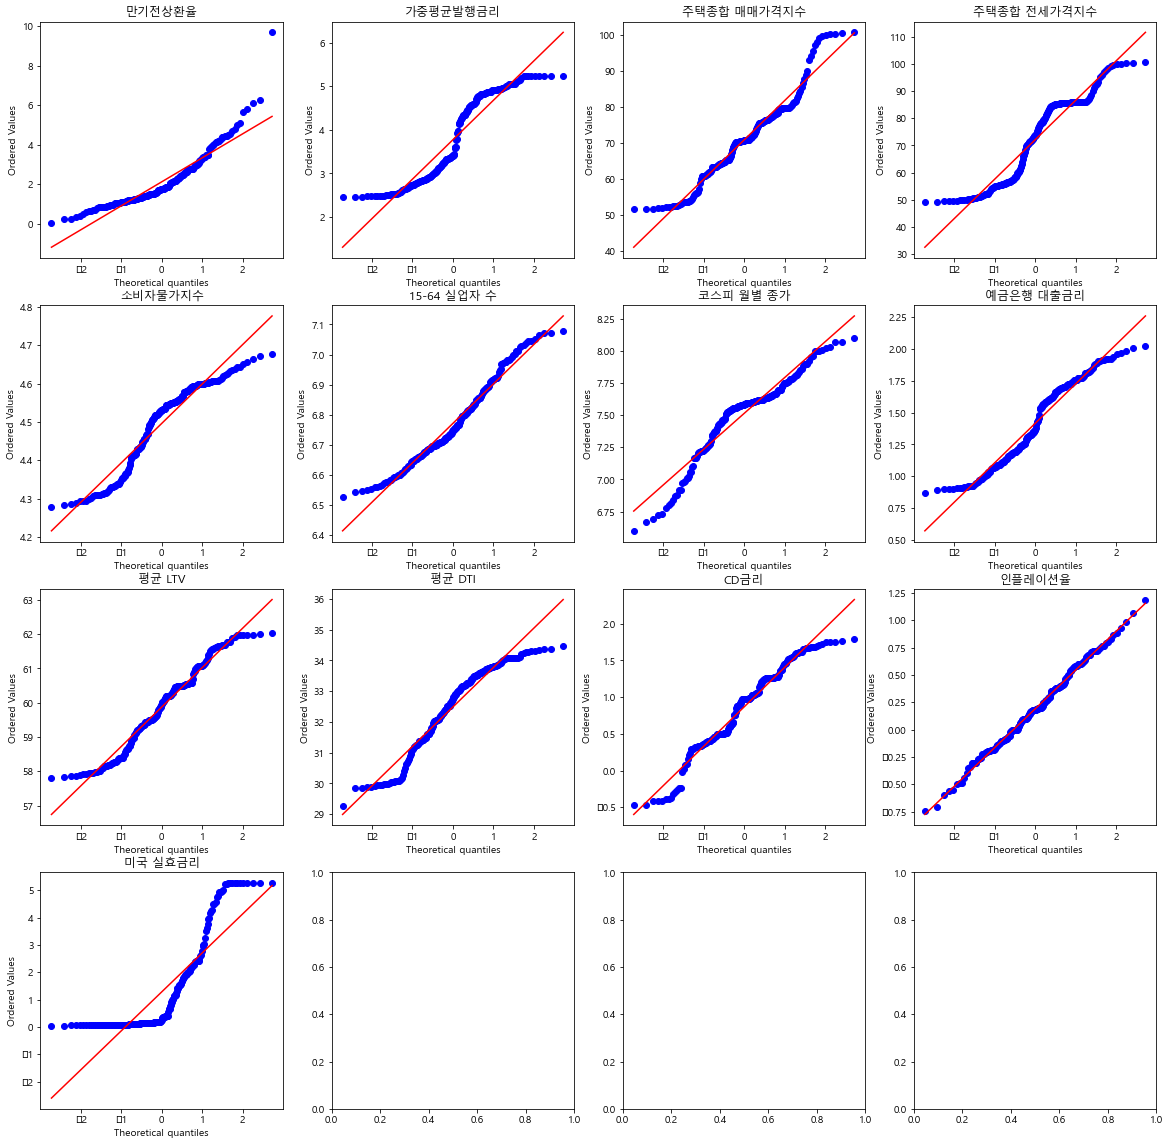

In [15]:
# 전처리 후 데이터
fig, axes = plt.subplots(4, 4)
fig.set_size_inches((20,20))
plt.rc('font', family='Malgun Gothic') ## 한글 깨짐 설정

stats.probplot(data_a["만기전상환율"], dist=stats.norm, plot=axes[0,0])
axes[0,0].title.set_text("만기전상환율")
stats.probplot(data_a["가중평균발행금리"], dist=stats.norm, plot=axes[0,1])
axes[0,1].title.set_text("가중평균발행금리")
stats.probplot(data_a["주택종합 매매가격지수"], dist=stats.norm, plot=axes[0,2])
axes[0,2].title.set_text("주택종합 매매가격지수")
stats.probplot(data_a["주택종합 전세가격지수"], dist=stats.norm, plot=axes[0,3])
axes[0,3].title.set_text("주택종합 전세가격지수")
stats.probplot(data_a["소비자물가지수"], dist=stats.norm, plot=axes[1,0])
axes[1,0].title.set_text("소비자물가지수")
stats.probplot(data_a["15-64 실업자 수"], dist=stats.norm, plot=axes[1,1])
axes[1,1].title.set_text("15-64 실업자 수")
stats.probplot(data_a["코스피 월별 종가"], dist=stats.norm, plot=axes[1,2])
axes[1,2].title.set_text("코스피 월별 종가")
stats.probplot(data_a["예금은행 대출금리"], dist=stats.norm, plot=axes[1,3])
axes[1,3].title.set_text("예금은행 대출금리")
stats.probplot(data_a["평균 LTV"], dist=stats.norm, plot=axes[2,0])
axes[2,0].title.set_text("평균 LTV")
stats.probplot(data_a["평균 DTI"], dist=stats.norm, plot=axes[2,1])
axes[2,1].title.set_text("평균 DTI")
stats.probplot(data_a["CD금리"], dist=stats.norm, plot=axes[2,2])
axes[2,2].title.set_text("CD금리")
stats.probplot(data_a["인플레이션율"], dist=stats.norm, plot=axes[2,3])
axes[2,3].title.set_text("인플레이션율")
stats.probplot(data_a["미국 실효금리"], dist=stats.norm, plot=axes[3,0])
axes[3,0].title.set_text("미국 실효금리")